# Primeira Prova de Introdução à Inteligência Artifical
### Aluno(a): Maria Victória Grisi Pinheiro Fabião de Araújo
### Matrícula: 20190027173


#Primeira Questão
##Para cada um dos agentes a seguir, desenvolva uma descrição completando a tabela abaixo sobre o ambiente de tarefas de cada um.

*   (a) Agente comentarista de jogo
*   (b) Agente sugestor de vinho
*   (c) Agente treinador de time (como de basquete)





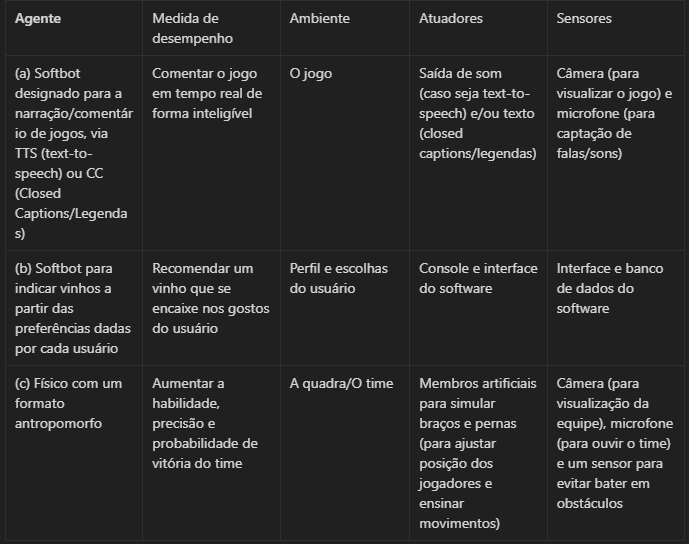

#Segunda Questão
##Diferencie os 4 tipos de aprendizado de máquina. Para tanto, escolha uma base de dados do Kaggle e explique como aplicar os 4 métodos nessa mesma base.

### Aprendizado Supervisionado

Na aprendizagem supervisionada, eu poderia usar a classe “year” e pedir para que a máquina identificasse o ano que a estética do Doodle dado como entrada pertence.

### Aprendizado Não Supervisionado

Com a aprendizagem não supervisionada, seria interessante testar como a máquina identifica as paletas de cores das imagens. Eu pediria para ela agrupar os Doodles, lhes dar uma classe e ver se a clusterização foi feita a partir das cores de cada um.

### Aprendizado Semi-Supervisionado

Já com na aprendizagem semi-supervisionada, eu poderia classificar alguns dados de acordo com a sua data festiva (ex: Halloween, Natal, Páscoa) e deixar outros dados sem classe, para que a máquina pudesse tentar assimilar as classes com os elementos encontrados em cada imagem.

### Aprendizado por Reforço

Por fim, na aprendizagem por reforço, seria interessante testar os Doodles dinâmicos (ex: Olimípiadas de Tóquio 2020 ([https://www.google.com/doodles/doodle-champion-island-games-begin](https://www.google.com/doodles/doodle-champion-island-games-begin))) e dar os parâmetros necessários para que a máquina conseguisse atingir os objetivos desses Doodles (jogos, montar puzzles, etc.).

#Terceira Questão
##Em um Jupyter Notebook (link do colab, GitHub ou arquivo), utilize o método K vizinhos mais próximos na base escolhida na questão anterior para um contexto SUPERVISIONADO e para classificação:
1. **Aplique processos de pré-processamento e os necessários para execução do método K-NN.**
2. **Aplique correlação ou PCA e selecione um número menor de atributos com esses métodos e justifique sua decisão.**
3. **Escolha 5 valores de K e mostre os resultados (escolha 3 métricas de avaliação e mostre a matriz de confusão) e explique os resultados encontrados.**
4. **Escolha 2 métricas de similaridade (diferentes distâncias ou outras métricas - correlação, por exemplo) para definir o(s) vizinho(s) mais próximos e explique os resultados encontrados.**
5. **Melhor K e melhor distância e testar com o conjunto de atributos do item 2.**

Atributos do list.csv
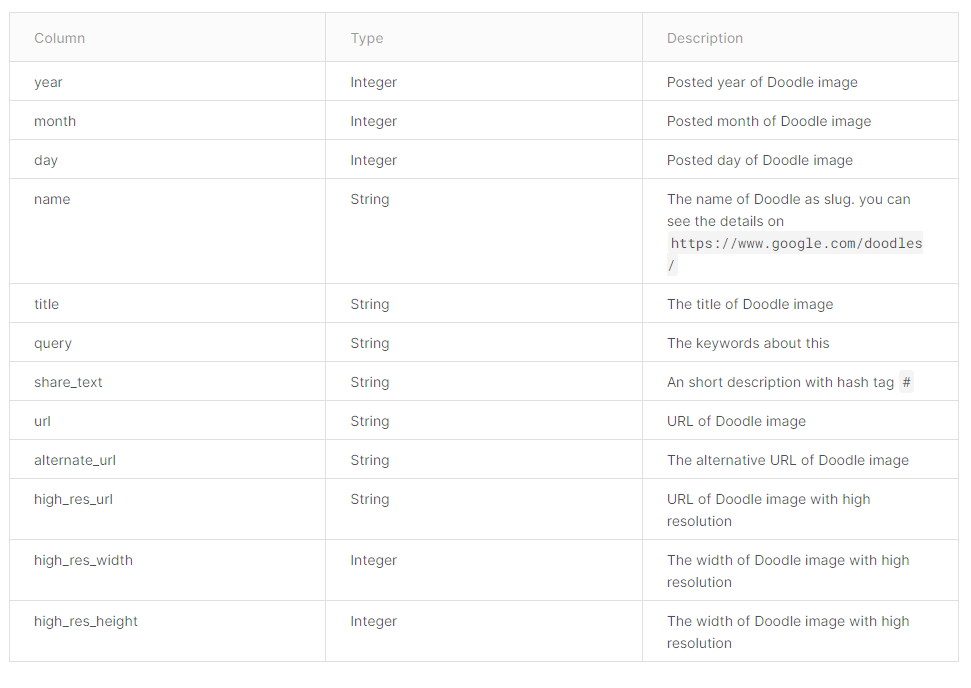

## Importando as bibliotecas necessárias

In [ ]:
# Importando as bibliotecas necessárias

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import cluster, neighbors, svm, metrics, preprocessing

## Importando o dataset em meu drive
Link do dataset: https://www.kaggle.com/datasets/joonasyoon/google-doodles

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/IIA/list.csv')
dataset

,year,month,day,name,title,query,share_text,url,alternate_url,high_res_url,high_res_width,high_res_height
0,1999,10,31,halloween-1999,Halloween 1999,Halloween 1999,Halloween 1999 #GoogleDoodle,//www.google.com/logos/1999/googlepump.gif,NaN,//www.google.com/logos/1999/googlepump.gif,306.0,130.0
1,1999,11,23,thanksgiving-1999,Thanksgiving 1999,Thanksgiving 1999,Thanksgiving 1999 #GoogleDoodle,//www.google.com/logos/1999/turkey_home2.gif,NaN,//www.google.com/logos/1999/turkey_home2.gif,276.0,128.0
2,1999,11,30,uncle-sam-search-1,'Uncle Sam' Search #1,'Uncle Sam' Search #1,'Uncle Sam' Search #1 #GoogleDoodle,//www.google.com/logos/1999/unclesam2.gif,NaN,//www.google.com/logos/1999/unclesam2.gif,291.0,102.0
3,1999,11,30,uncle-sam-search-2,'Uncle Sam' Search #2,'Uncle Sam' Search #2,'Uncle Sam' Search #2 #GoogleDoodle,//www.google.com/logos/1999/unclesam.gif,NaN,//www.google.com/logos/1999/unclesam.gif,291.0,102.0
4,1999,12,25,happy-holidays-from-google-1999,Happy Holidays from Google 1999,Happy Holidays from Google 1999,Happy Holidays from Google 1999 #GoogleDoodle,//www.google.com/logos/1999/snowmanC.gif,NaN,//www.google.com/logos/1999/snowmanC.gif,338.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5279,2022,4,9,nomhle-nkonyenis-80th-birthday,Nomhle Nkonyeni's 80th Birthday,Nomhle Nkonyeni,Nomhle Nkonyeni's 80th Birthday! #GoogleDoodle,//www.google.com/logos/doodles/2022/nomhle-nko...,https://lh3.googleusercontent.com/rvxcGNkarJZK...,//www.google.com/logos/doodles/2022/nomhle-nko...,686.0,400.0
5280,2022,4,10,france-elections-2022-first-round,France Elections 2022 (First Round),France Election,France Elections 2022 (First Round) #GoogleDoodle,//www.google.com/logos/doodles/2022/france-ele...,https://lh3.googleusercontent.com/8lVsF_Q9Yot7...,//www.google.com/logos/doodles/2022/france-ele...,1000.0,400.0
5281,2022,4,12,montserrat-caballes-89th-birthday,Montserrat Caballé's 89th Birthday,Montserrat Caballé,Montserrat Caballé's 89th Birthday! #GoogleDoodle,//www.google.com/logos/doodles/2022/montserrat...,https://lh3.googleusercontent.com/_Lrfq4wq8FmQ...,//www.google.com/logos/doodles/2022/montserrat...,980.0,400.0
5282,2022,4,13,teachers-day-2022-april-13,Teachers' Day 2022 (April 13),Teachers' Day,Happy Teachers' Day! #GoogleDoodle,//www.google.com/logos/doodles/2022/teachers-d...,https://lh3.googleusercontent.com/rr9FDnbVCebZ...,//www.google.com/logos/doodles/2022/teachers-d...,1150.0,460.0


## Visualizando os dados do dataset

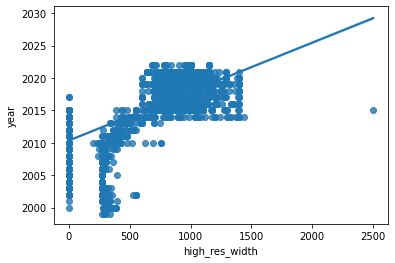

In [ ]:
sns.regplot(x = dataset['high_res_width'], y = dataset['year'])

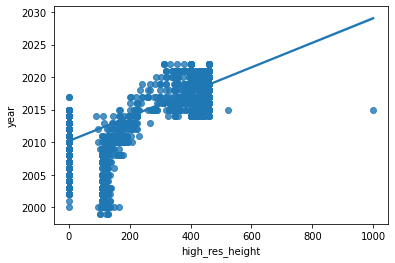

In [ ]:
sns.regplot(x = dataset['high_res_height'], y = dataset['year'])

## 1. Preparando os dados para a aplicação do método KNN (Pré-processamento)
Nesse passo, tive que criar um atributo categórico para meu dataset, pois sinto que lhe faltava um que fosse bem definido.
Decidi fazer o atributo categórico baseado na resolução da imagem do Google Doodle (imagens comemorativas feitas pela Google).

Criei uma coluna ("qnt_pixels") para representar a quantidade total de pixels em cada Doodle (multiplicar largura por altura) e plotei um gráfico para poder comparar com os plotados acima.

In [ ]:
dataset['qnt_pixels'] = dataset['high_res_height'] * dataset['high_res_width']

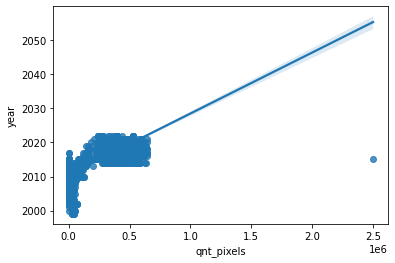

In [ ]:
sns.regplot(x = dataset['qnt_pixels'], y = dataset['year'])

Em seguida, criei uma função para poder criar a coluna com o atributo categórico, e baseando-se no sistema atual de resolução, classificar os dados em "X or Higher" e "Below X", sendo X a resolução em pixels.
Escolhi ficar com a resolução de 480p (640 x 480 = 307.200 pixels), pois ela encaixa direito no meu dataset.

In [ ]:
# Resoluções e suas quantidades totais de pixels: 240p = 102.240, 360p = 230.400, 480p = 307.200, 720p = 921.600

def pixel_classifier(total_pixels, dataset):
  dataset['quality'] = np.where(dataset['qnt_pixels'] >= total_pixels, '480p or Higher', 'Below 480p')

pixel_classifier(307200, dataset)

In [ ]:
dataset

,year,month,day,name,title,query,share_text,url,alternate_url,high_res_url,high_res_width,high_res_height,qnt_pixels,quality
0,1999,10,31,halloween-1999,Halloween 1999,Halloween 1999,Halloween 1999 #GoogleDoodle,//www.google.com/logos/1999/googlepump.gif,NaN,//www.google.com/logos/1999/googlepump.gif,306.0,130.0,39780.0,Below 480p
1,1999,11,23,thanksgiving-1999,Thanksgiving 1999,Thanksgiving 1999,Thanksgiving 1999 #GoogleDoodle,//www.google.com/logos/1999/turkey_home2.gif,NaN,//www.google.com/logos/1999/turkey_home2.gif,276.0,128.0,35328.0,Below 480p
2,1999,11,30,uncle-sam-search-1,'Uncle Sam' Search #1,'Uncle Sam' Search #1,'Uncle Sam' Search #1 #GoogleDoodle,//www.google.com/logos/1999/unclesam2.gif,NaN,//www.google.com/logos/1999/unclesam2.gif,291.0,102.0,29682.0,Below 480p
3,1999,11,30,uncle-sam-search-2,'Uncle Sam' Search #2,'Uncle Sam' Search #2,'Uncle Sam' Search #2 #GoogleDoodle,//www.google.com/logos/1999/unclesam.gif,NaN,//www.google.com/logos/1999/unclesam.gif,291.0,102.0,29682.0,Below 480p
4,1999,12,25,happy-holidays-from-google-1999,Happy Holidays from Google 1999,Happy Holidays from Google 1999,Happy Holidays from Google 1999 #GoogleDoodle,//www.google.com/logos/1999/snowmanC.gif,NaN,//www.google.com/logos/1999/snowmanC.gif,338.0,121.0,40898.0,Below 480p
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5279,2022,4,9,nomhle-nkonyenis-80th-birthday,Nomhle Nkonyeni's 80th Birthday,Nomhle Nkonyeni,Nomhle Nkonyeni's 80th Birthday! #GoogleDoodle,//www.google.com/logos/doodles/2022/nomhle-nko...,https://lh3.googleusercontent.com/rvxcGNkarJZK...,//www.google.com/logos/doodles/2022/nomhle-nko...,686.0,400.0,274400.0,Below 480p
5280,2022,4,10,france-elections-2022-first-round,France Elections 2022 (First Round),France Election,France Elections 2022 (First Round) #GoogleDoodle,//www.google.com/logos/doodles/2022/france-ele...,https://lh3.googleusercontent.com/8lVsF_Q9Yot7...,//www.google.com/logos/doodles/2022/france-ele...,1000.0,400.0,400000.0,480p or Higher
5281,2022,4,12,montserrat-caballes-89th-birthday,Montserrat Caballé's 89th Birthday,Montserrat Caballé,Montserrat Caballé's 89th Birthday! #GoogleDoodle,//www.google.com/logos/doodles/2022/montserrat...,https://lh3.googleusercontent.com/_Lrfq4wq8FmQ...,//www.google.com/logos/doodles/2022/montserrat...,980.0,400.0,392000.0,480p or Higher
5282,2022,4,13,teachers-day-2022-april-13,Teachers' Day 2022 (April 13),Teachers' Day,Happy Teachers' Day! #GoogleDoodle,//www.google.com/logos/doodles/2022/teachers-d...,https://lh3.googleusercontent.com/rr9FDnbVCebZ...,//www.google.com/logos/doodles/2022/teachers-d...,1150.0,460.0,529000.0,480p or Higher


Gráfico para visualizar a variação da qualidade com o passar dos anos.

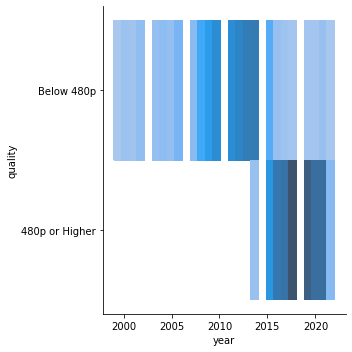

In [ ]:
sns.displot(x = dataset['year'], y = dataset['quality'])

Utilizando o Label Encoder para passar todos os atributos descritos em "qualidades" para números/tags.

In [ ]:
le = preprocessing.LabelEncoder()
for column in dataset.columns:
    if dataset[column].dtypes == 'object':
        dataset[column] = le.fit_transform(dataset[column])

## 2. Aplicando correlação e PCA
Decidi utilizar ambos métodos só para garantir que o dataset será o mais preciso o possível.

### Correlação

Fiz a primeira matriz de confusão para ver como estavam os dados no geral, mesmo já tendo em mente que eu iria ter que retirar alguns atributos para poder otimizar o dataset.

In [ ]:
corr = dataset.corr()
corr.style.background_gradient(cmap='coolwarm')

,year,month,day,name,title,query,share_text,url,alternate_url,high_res_url,high_res_width,high_res_height,qnt_pixels,quality
year,1.000000,-0.020828,0.003628,0.045678,0.051418,0.031678,-0.007504,0.964090,-0.561183,-0.113639,0.748762,0.764601,0.772817,-0.762045
month,-0.020828,1.000000,-0.049242,-0.006497,-0.007070,-0.044109,-0.024972,-0.015407,-0.000469,-0.051111,0.024017,0.030140,0.023247,-0.035134
day,0.003628,-0.049242,1.000000,-0.008094,-0.009181,-0.009244,-0.022890,0.007951,-0.026443,-0.014609,0.017803,0.018944,0.016961,-0.016255
name,0.045678,-0.006497,-0.008094,1.000000,0.994148,0.613411,0.833508,0.099407,-0.051533,0.019792,0.033126,0.026225,0.028344,-0.039972
title,0.051418,-0.007070,-0.009181,0.994148,1.000000,0.617511,0.838121,0.103085,-0.053747,0.021590,0.035672,0.028294,0.031027,-0.043087
query,0.031678,-0.044109,-0.009244,0.613411,0.617511,1.000000,0.557127,0.079802,-0.013276,0.006200,0.051815,0.049344,0.050176,-0.045153
share_text,-0.007504,-0.024972,-0.022890,0.833508,0.838121,0.557127,1.000000,0.022059,-0.019200,0.040544,-0.034821,-0.042461,-0.034052,0.036324
url,0.964090,-0.015407,0.007951,0.099407,0.103085,0.079802,0.022059,1.000000,-0.542838,-0.157851,0.799954,0.815834,0.812500,-0.798856
alternate_url,-0.561183,-0.000469,-0.026443,-0.051533,-0.053747,-0.013276,-0.019200,-0.542838,1.000000,0.166929,-0.467434,-0.472769,-0.480172,0.461596
high_res_url,-0.113639,-0.051111,-0.014609,0.019792,0.021590,0.006200,0.040544,-0.157851,0.166929,1.000000,-0.611106,-0.611886,-0.508450,0.445373


Após ter visto, garanti que seria melhor tirar tudo que não estivesse relacionado à resolução e ao ano de publicação do Doodle, já que o resto não impactava na categorização do dado.

In [ ]:
dataset = dataset.drop(['month', 'day', 'name', 'title', 'query','share_text', 'url', 'alternate_url', 'high_res_url'], 1)
dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,year,high_res_width,high_res_height,qnt_pixels,quality
0,1999,306.0,130.0,39780.0,1
1,1999,276.0,128.0,35328.0,1
2,1999,291.0,102.0,29682.0,1
3,1999,291.0,102.0,29682.0,1
4,1999,338.0,121.0,40898.0,1
...,...,...,...,...,...
5279,2022,686.0,400.0,274400.0,1
5280,2022,1000.0,400.0,400000.0,0
5281,2022,980.0,400.0,392000.0,0
5282,2022,1150.0,460.0,529000.0,0


Feita a limpeza, fiz outra matriz de confusão e percebi que o resultado foi bem mais claro e sucinto.

In [ ]:
corr = dataset.corr()
corr.style.background_gradient(cmap='coolwarm')

,year,high_res_width,high_res_height,qnt_pixels,quality
year,1.000000,0.748762,0.764601,0.772817,-0.762045
high_res_width,0.748762,1.000000,0.977219,0.979233,-0.923559
high_res_height,0.764601,0.977219,1.000000,0.967069,-0.924984
qnt_pixels,0.772817,0.979233,0.967069,1.000000,-0.938146
quality,-0.762045,-0.923559,-0.924984,-0.938146,1.000000


### PCA

Poderia ter partido das correlações diretamente para a aplicação do KNN, mas quis também visualizar como ficaria se usasse PCA.

Separei o atributo categórico (y) do resto do dataset (x)

In [ ]:
y = dataset['quality']
x = dataset.drop(['quality'], 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


Apliquei o PCA para que ficasse com apenas 2 atributos, pois o dataset (x) já estava com apenas 4 colunas.

In [ ]:
pca = PCA(n_components = 2, copy = True)
X = pca.fit_transform(x)

pca.explained_variance_ratio_
np.round(pca.explained_variance_ratio_, 7)

array([9.999997e-01, 2.000000e-07])

O resultado do PCA mostra que se eu dividisse em apenas 2 componentes, o primeiro componente principal já seria responsável por 99% dos dados.

## 3. Aplicando o K-NN

Primeiro eu separei as samples/amostras em 80/20, para treino e teste, respectivamente. Após isso, passei o atributo categórico ("quality") para as variáveis de treino e teste do y e deletei as suas colunas das variáveis de x.

In [ ]:
train_x = dataset.sample(frac = 0.8, random_state = 1)
test_x = pd.concat([dataset, train_x]).drop_duplicates(keep = False)

train_y = train_x["quality"]
test_y = test_x["quality"]

del train_x["quality"]
del test_x["quality"]

Feito isso, criei um vetor ("KNN_Predicts_Accuracy") para armazenar o valor de acurácia dado pela função usada ("accuracy_score") e utilizei um laço for para que fosse possível aplicar os dados em K-NN com diferentes valores para K, sendo "i" sempre um número ímpar no intervalo de 1 a 10 (1, 3, 5, 7, 9).

Imprime-se o valor da acurácia e os itens que formariam uma matriz de confusão (Verdadeiros Negativos, Falsos Positivos, Falsos Negativos e Verdadeiros Positivos) de cada valor K.

A função KNeighborsClassifier utiliza, por padrão, a Distância Euclidiana (Minkowski com p = 2)

In [ ]:
KNN_Predicts_Accuracy = []

for i in range(1, 10, 2):
  print(f"K-NN: {i}")

  knn = neighbors.KNeighborsClassifier(n_neighbors = i, algorithm = "auto")
  knn.fit(train_x, train_y)
  result = knn.predict(test_x)

  acuracia = metrics.accuracy_score(test_y, result)
  KNN_Predicts_Accuracy.append(acuracia)
  print("Acurácia: {:.2f}".format(acuracia))

  vn, fp, fn, vp = metrics.confusion_matrix(test_y, result).ravel()
  print(f"Verdadeiros Negativos: {vn}\nFalsos Positivos: {fp}\nFalsos Negativos: {fn}\nVerdadeiros Positivos: {vp}\n")

K-NN: 1
Acurácia: 1.00
Verdadeiros Negativos: 104
Falsos Positivos: 0
Falsos Negativos: 0
Verdadeiros Positivos: 88

K-NN: 3
Acurácia: 1.00
Verdadeiros Negativos: 104
Falsos Positivos: 0
Falsos Negativos: 0
Verdadeiros Positivos: 88

K-NN: 5
Acurácia: 1.00
Verdadeiros Negativos: 104
Falsos Positivos: 0
Falsos Negativos: 0
Verdadeiros Positivos: 88

K-NN: 7
Acurácia: 1.00
Verdadeiros Negativos: 104
Falsos Positivos: 0
Falsos Negativos: 0
Verdadeiros Positivos: 88

K-NN: 9
Acurácia: 1.00
Verdadeiros Negativos: 104
Falsos Positivos: 0
Falsos Negativos: 0
Verdadeiros Positivos: 88



Plotei um gráfico para a visualização da variação (zero) da acurácia do método K-NN de acordo com o valor de K.

Text(0, 0.5, 'Acurácia')

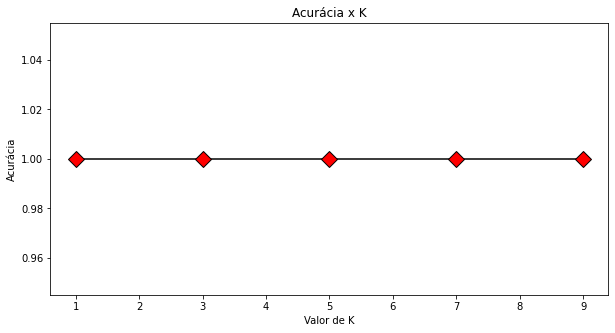

In [ ]:
plt.figure(figsize=(10, 5))  
plt.plot(range(1, 10, 2), KNN_Predicts_Accuracy, color = 'black', marker = 'D', markerfacecolor = 'red', markersize = 12)
plt.title('Acurácia x K')  
plt.xlabel('Valor de K')  
plt.ylabel('Acurácia')  

## 4. Testando outras métricas/cálculo de distância para K-NN

### Distância de Chebyshev

In [ ]:
KNN_Predicts_Accuracy = []

for i in range(1, 10, 2):
  print(f"K-NN: {i}")

  knn = neighbors.KNeighborsClassifier(n_neighbors = i, algorithm = "auto", metric = 'chebyshev')
  knn.fit(train_x, train_y)
  result = knn.predict(test_x)

  acuracia = metrics.accuracy_score(test_y, result)
  KNN_Predicts_Accuracy.append(acuracia)
  print("Acurácia: {:.2f}".format(acuracia))

  vn, fp, fn, vp = metrics.confusion_matrix(test_y, result).ravel()
  print(f"Verdadeiros Negativos: {vn}\nFalsos Positivos: {fp}\nFalsos Negativos: {fn}\nVerdadeiros Positivos: {vp}\n")

K-NN: 1
Acurácia: 1.00
Verdadeiros Negativos: 104
Falsos Positivos: 0
Falsos Negativos: 0
Verdadeiros Positivos: 88

K-NN: 3
Acurácia: 1.00
Verdadeiros Negativos: 104
Falsos Positivos: 0
Falsos Negativos: 0
Verdadeiros Positivos: 88

K-NN: 5
Acurácia: 1.00
Verdadeiros Negativos: 104
Falsos Positivos: 0
Falsos Negativos: 0
Verdadeiros Positivos: 88

K-NN: 7
Acurácia: 1.00
Verdadeiros Negativos: 104
Falsos Positivos: 0
Falsos Negativos: 0
Verdadeiros Positivos: 88

K-NN: 9
Acurácia: 1.00
Verdadeiros Negativos: 104
Falsos Positivos: 0
Falsos Negativos: 0
Verdadeiros Positivos: 88



### Distância de Manhattan

In [ ]:
KNN_Predicts_Accuracy = []

for i in range(1, 10, 2):
  print(f"K-NN: {i}")

  knn = neighbors.KNeighborsClassifier(n_neighbors = i, algorithm = "auto", metric = 'manhattan')
  knn.fit(train_x, train_y)
  result = knn.predict(test_x)

  acuracia = metrics.accuracy_score(test_y, result)
  KNN_Predicts_Accuracy.append(acuracia)
  print("Acurácia: {:.2f}".format(acuracia))

  vn, fp, fn, vp = metrics.confusion_matrix(test_y, result).ravel()
  print(f"Verdadeiros Negativos: {vn}\nFalsos Positivos: {fp}\nFalsos Negativos: {fn}\nVerdadeiros Positivos: {vp}\n")

K-NN: 1
Acurácia: 1.00
Verdadeiros Negativos: 104
Falsos Positivos: 0
Falsos Negativos: 0
Verdadeiros Positivos: 88

K-NN: 3
Acurácia: 1.00
Verdadeiros Negativos: 104
Falsos Positivos: 0
Falsos Negativos: 0
Verdadeiros Positivos: 88

K-NN: 5
Acurácia: 1.00
Verdadeiros Negativos: 104
Falsos Positivos: 0
Falsos Negativos: 0
Verdadeiros Positivos: 88

K-NN: 7
Acurácia: 1.00
Verdadeiros Negativos: 104
Falsos Positivos: 0
Falsos Negativos: 0
Verdadeiros Positivos: 88

K-NN: 9
Acurácia: 1.00
Verdadeiros Negativos: 104
Falsos Positivos: 0
Falsos Negativos: 0
Verdadeiros Positivos: 88



Conclusão: Não houve mudanças entre as métricas adotadas, pois o dataset está bem definido.

## 5. Melhor K e melhor distância
Como não houve nenhuma alteração entre os valores de K e as distâncias, por padrão o melhor será K = 1 e Distância de Manhattan, pela sua baixa complexidade.

#Quarta Questão


##Considerando a matriz de confusão abaixo, quais são os valores das métricas listadas abaixo?

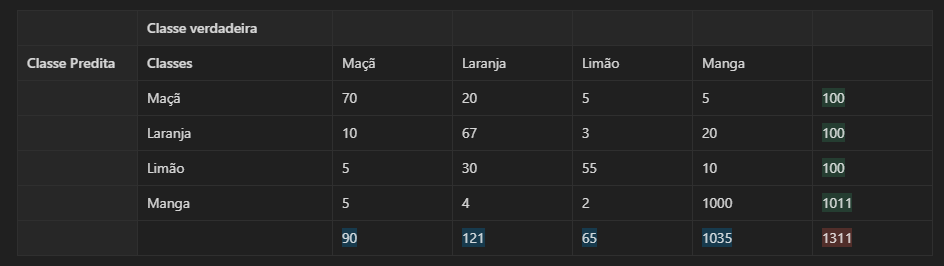

### Lista de Métricas
- Sensibilidade
- Medida F1
- Especificidade
- Precisão
- Acurácia
- Coeficiente de Matthews
- AUC

### Contagem

- **VP (Verdadeiros Positivos)**
    - **Maçã** = 70
    - **Laranja** = 67
    - **Limão** = 55
    - **Manga** = 1000
- **FP (Falsos Positivos)**
    - **Maçã** = 30
    - **Laranja** = 33
    - **Limão** = 45
    - **Manga** = 11
- **VN (Verdadeiros Negativos)**
    - **Maçã** = 1122
    - **Laranja** = 1125
    - **Limão** =  1137
    - **Manga** = 192
- **FN (Falsos Negativos)**
    - **Maçã** = 20
    - **Laranja** = 54
    - **Limão** = 10
    - **Manga** = 35

### Importando as bibliotecas necessárias

In [ ]:
import math
import numpy as np

### Sensibilidade/Sensitivity/Recall/True Positive Rate 

In [ ]:
def sensibilidade(VP, FN):
  return (VP/(VP + FN))

### Especificidade/Specificity

In [ ]:
def especificidade(VN, FP):
  return (VN/(VN + FP))

### Precisao/Precision

In [ ]:
def precisao(VP, FP):
  return (VP/(VP + FP))

### Medida F1/F1 Score


In [ ]:
def f_one(VP, FN, FP):
  sens = sensibilidade(VP, FN)
  prec = precisao(VP, FP)
  return ((2 * sens * prec)/(sens + prec))

### Acurácia/Accuracy


In [ ]:
def acuracia(VP, VN, n):
  return ((VP + VN)/n)

### Coeficiente de Matthews/Matthews Coefficient


In [ ]:
def coef_m(VP, VN, FP, FN):
  return (((VP * VN) - (FP * FN))/(math.sqrt((VP + FP) * (VP + FN) * (VN + FP) * (VN + FN))))

### AUC

In [ ]:
def auc(VP, VN, FP, FN):
  False_Positive_Rate = (FP/(FP + VN))
  True_Positive_Rate = sensibilidade(VP, FN)
  
  x = np.array([0, False_Positive_Rate, 1])
  y = np.array([0, True_Positive_Rate, 1])

  return np.trapz(y, x)

Para aplicar as métricas de avaliação, eu decidi somar cada valor de Verdadeiros Positivos e fazer isso com o resto dos pontos da matriz (Verdadeiros Negativos, Falsos Positivos e Falsos Negativos)

In [ ]:
VP = (70 + 67 + 55 + 1000)
FP = (30 + 33 + 45 + 11)
VN = (1122 + 1125 + 1137 + 192)
FN = (20 + 54 + 10 + 35)
n = 1311

In [ ]:
print("Sensibilidade: {:.5f}".format(sensibilidade(VP, FN)))
print("Especificidade: {:.5f}".format(especificidade(VN, FP)))
print("Precisão: {:.5f}".format(precisao(VP, FP)))
print("Medida F1: {:.5f}".format(f_one(VP, FN, FP)))
print("Acurácia: {:.5f}".format(acuracia(VP, VN, n)))
print("Coeficiente de Matthews: {:.5f}".format(coef_m(VP, VN, FP, FN)))
print("AUC: {:.5f}".format(auc(VP, VN, FP, FN)))

Sensibilidade: 0.90923
Especificidade: 0.96779
Precisão: 0.90923
Medida F1: 0.90923
Acurácia: 3.63692
Coeficiente de Matthews: 0.87702
AUC: 0.93851


## Como você resolveria o problema dessa base de dados observando as métricas de avaliação?

Eu tentaria rebalancear a quantidade de dados, pois a classe "Manga" possui 1000 Verdadeiros Positivos, enquanto o resto das classes fica na média de dois algarismos. Após isso, eu ainda iria normalizar os dados para deixá-los menores e mais próximos. Depois eu reavaliaria as métricas de avaliação.

#Quinta Questão
##Elabore uma pergunta e responda sobre "Preconceito e Inteligência Artificial", refletindo aspectos importantes do método que uma pessoa engenheiro de dados/cientista de dados deve conhecer e se preocupar garantindo ética nos modelos criados.

###Pergunta
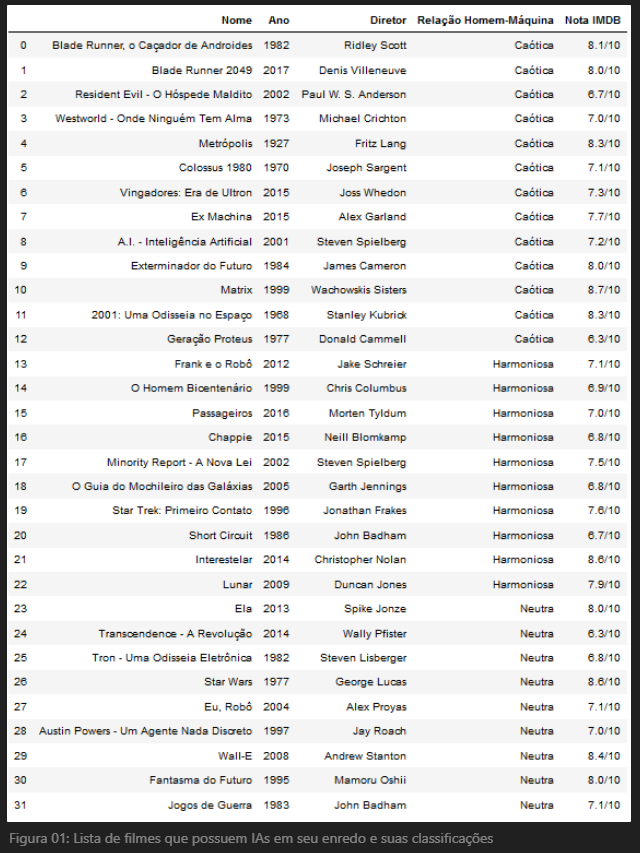


Vendo a figura acima e analisando a classificação do atributo “Relação Homem-Máquina” e as notas da coluna “Notas IMDB”, é possível perceber que a maioria dos filmes na lista são de classificação “Caótica” e que estas possuem a maior média em comparação às outras classes. A partir dessa afirmação, disserte sobre o porquê do ser humano produzir tantos filmes sobre relações conflituosas entre o ser humano e a máquina com inteligência artificial.

###Resposta

De acordo com Lovecraft, o maior e mais antigo medo do homem é o medo do desconhecido. Comparando a tecnologia de Inteligência Artificial atual com a encontrada nos filmes, é perceptível que estamos muito longe de alcançar o que é imaginado para os roteiros cinematográficos. Ou seja: Não conhecemos o futuro da IA, e, do jeito que as tecnologias têm avançado, o homem teme que a máquina ultrapasse seu criador e, ao se tornar senciente, decida se vingar da humanidade pelos seus atos. No fim, o preconceito que é gerado pelo imaginário daquilo que não conhecemos ainda é compreensível, mas desnecessário, pois no fim a máquina sempre estará trabalhando com dados, sejam eles discretos ou contínuos, impossibilitando-a de pensar como um ser vivo, e o humano continuará imaginando e criando coisas.